<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/Sesi%C3%B3n8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sesión 8**
Módulo 3. Python

Jueves 4 de marzo de 2021

**Ejemplo 1**
Conectándose a una base de datos remota

- Usar `mysql-connector-python` para conectarse a una base de datos remota

In [7]:
!pip install mysql-connector-python

     |████████████████████████████████| 18.1MB 240kB/s 


In [8]:
import mysql.connector

In [ ]:
#Conexión
cnx = mysql.connector.connect(
    host = "ec2-34-214-107-20.us-west-2.compute.amazonaws.com",
    port = 3306,
    user = " ", #eliminado
    password = " ", #eliminado
    database = "movielens"
)
# IMPORTANTE: Al "publicar" la libreta, quitar esta información de acceso. Check!

In [11]:
#Cursor: Donde se escriben los comandos de MySQL
cursor = cnx.cursor()

In [19]:
#Comando para ejecutar
cursor.execute("SHOW TABLES")

In [20]:
result = cursor.fetchall()

In [21]:
#Ver qué trae result
result

[('age_ranges',), ('movies',), ('occupations',), ('ratings',), ('users',)]

In [25]:
#Ejemplo de tupla con coma adentro del paréntesis cuando tiene un sólo elemento
type ( (5,))

tuple

In [26]:
#Cerrar la conexión
cursor.close()

True

Ejemplo 2


In [27]:
cnx = mysql.connector.connect(
    host = "ec2-34-214-107-20.us-west-2.compute.amazonaws.com",
    port = 3306,
    user = "data",
    password = "khQ9--mp6LWq97iA",
    database = "movielens"
)

In [29]:
cursor = cnx.cursor()

In [30]:
cursor.execute("SELECT * FROM users")

In [31]:
result= cursor.fetchall()

In [32]:
result[0]
# user_id, gender, age, occupation, zip

(1, '"', 1, 10, '"48067"')

In [4]:
import pandas as pd

In [36]:
df = pd.DataFrame(result, columns=['user_id', 'gender', 'age', 'occupation', 'zip'])

In [37]:
df.dtypes

user_id        int64
gender        object
age            int64
occupation     int64
zip           object
dtype: object

In [38]:
df.head()

,user_id,gender,age,occupation,zip
0,1,"""",1,10,"""48067"""
1,2,"""",56,16,"""70072"""
2,3,"""",25,15,"""55117"""
3,4,"""",45,7,"""02460"""
4,5,"""",25,20,"""55455"""


In [39]:
# Cambiar índice usando user_id y desechar índice anterior
df = df.set_index('user_id', drop=True)

In [40]:
df.head()

,gender,age,occupation,zip
user_id,,,,
1,"""",1,10,"""48067"""
2,"""",56,16,"""70072"""
3,"""",25,15,"""55117"""
4,"""",45,7,"""02460"""
5,"""",25,20,"""55455"""


In [47]:
#Guardad en csv
df.to_csv("movies_user.csv")

**Reto 2**
Convertir tablas a DataFrames

1. Vuelve a establecer la conexión a la base de datos
2. Usando el comando SELECT * FROM nombre_de_tabla, realiza consultas a cada una de las 5 tablas que existen en la base de datos.
3. Crea un DataFrame por cada tabla que obtuviste. Para asignarle los nombres de las columnas correctamente, revisa el archivo Readme.md donde está contenida toda esa información.
4. Asegúrate de que el índice sea adecuado en cada DataFrame. En los casos en los que haya datos redundantes, convierte una de las columnas en índice.
5. Si lo deseas ordena las columnas de la manera en la que mejor te parezca.
6. Guarda tus DataFrames en formato .csv para utilizarlos en los siguientes Retos.

In [51]:
cnx = mysql.connector.connect(
    host = "ec2-34-214-107-20.us-west-2.compute.amazonaws.com",
    port = 3306,
    user = "data",
    password = "khQ9--mp6LWq97iA",
    database = "movielens"
)

In [52]:
cursor = cnx.cursor()

In [55]:
# age_ranges
cursor.execute("SELECT * FROM age_ranges")
resultado = cursor.fetchall()
resultado[0]

(1, '"Under 18"')

In [57]:
df = pd.DataFrame(resultado, columns=['AgeID', 'AgeRange'])

In [58]:
df.head()

,AgeID,AgeRange
0,1,"""Under 18"""
1,18,"""18-24"""
2,25,"""25-34"""
3,35,"""35-44"""
4,45,"""45-49"""


In [59]:
#Guardad en csv
df.to_csv("movies_age_ranges.csv")

In [60]:
# movies
cursor.execute("SELECT * FROM movies")
resultado = cursor.fetchall()
resultado[0]

(1, '"Toy Story (1995)"', '"Animation|Children\'s|Comedy"')

In [62]:
df = pd.DataFrame(resultado, columns=['MovieID', 'Title', 'Genres'])
df.head()

,MovieID,Title,Genres
0,1,"""Toy Story (1995)""","""Animation|Children's|Comedy"""
1,2,"""Jumanji (1995)""","""Adventure|Children's|Fantasy"""
2,3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
3,4,"""Waiting to Exhale (1995)""","""Comedy|Drama"""
4,5,"""Father of the Bride Part II (1995)""","""Comedy"""


In [63]:
# Cambiar índice usando MovieID y desechar índice anterior
df = df.set_index('MovieID', drop=True)
df.head()

,Title,Genres
MovieID,,
1,"""Toy Story (1995)""","""Animation|Children's|Comedy"""
2,"""Jumanji (1995)""","""Adventure|Children's|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama"""
5,"""Father of the Bride Part II (1995)""","""Comedy"""


In [64]:
#Guardad en csv
df.to_csv("movies_movies.csv", sep='$')

In [65]:
# ocupations
cursor.execute("SELECT * FROM occupations")
resultado = cursor.fetchall()
resultado[0]

(0, '"other or not specified"')

In [66]:
df = pd.DataFrame(resultado, columns=['OccupationID', 'Description'])
df.head()

,OccupationID,Description
0,0,"""other or not specified"""
1,1,"""academic/educator"""
2,2,"""artist"""
3,3,"""clerical/admin"""
4,4,"""college/grad student"""


In [67]:
# Cambiar índice usando OccupationID y desechar índice anterior
df = df.set_index('OccupationID', drop=True)
df.head()

,Description
OccupationID,
0,"""other or not specified"""
1,"""academic/educator"""
2,"""artist"""
3,"""clerical/admin"""
4,"""college/grad student"""


In [68]:
#Guardad en csv
df.to_csv("movies_occupation.csv", sep='$')

In [69]:
# ratings
cursor.execute("SELECT * FROM ratings")
resultado = cursor.fetchall()
resultado[0]

(1, 1193, 5, 978300760)

In [70]:
df = pd.DataFrame(resultado, columns=['UserID', 'MovieID', 'Rating', 'Timestamp'])
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [71]:
#Guardad en csv
df.to_csv("movies_ratings.csv")

In [72]:
#Cerrar la conexión
cursor.close()

True

**Ejemplo 3**
Merge

- Tomar una base de datos segmentada y unirla usando el método `merge`

In [73]:
#Cargar csv modificados
users = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/cf3658c29dff13597642aaf8123b309f305e63bf/Datasets/MovieLens/users-raw.csv")
occupations = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/cf3658c29dff13597642aaf8123b309f305e63bf/Datasets/MovieLens/occupations-raw.csv")

In [76]:
users.head()

,user_id,gender,age,occupation,cp
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [77]:
occupations.head()

,occupation_id,description
0,0,other or not specified
1,1,academic/educator
2,2,artist
3,3,clerical/admin
4,4,college/grad student


In [78]:
#Merge, recordar que en Pandas el default es un "left join"
#Utilizamos left_on para indicar cual columna utilizar para unir a la izquierda y right_on para la tabla derecha,
#Pero en este caso usamos right_index porque usaremos el índice de la tabla derecha
users_occupation = pd.merge(users, occupations, left_on='occupation', right_index=True)
users_occupation.head()

,user_id,gender,age,occupation,cp,occupation_id,description
0,1,F,1,10,48067,10,K-12 student
18,19,M,1,10,48073,10,K-12 student
50,51,F,1,10,10562,10,K-12 student
74,75,F,1,10,01748,10,K-12 student
85,86,F,1,10,54467,10,K-12 student


In [79]:
#Cambiar nombre de columna
users_occupation = users_occupation.rename(columns={'description': 'occupation_description'})

In [82]:
#Cambiar nombre columna
users_occupation = users_occupation.rename(columns={'age': 'age_id'})

In [80]:
#La información de columnas occupation y occupation_id se repite
#Se puede usar drop o del
del users_occupation['occupation']
del users_occupation['occupation_id']
users_occupation.head()

,user_id,gender,age,cp,occupation_description
0,1,F,1,48067,K-12 student
18,19,M,1,48073,K-12 student
50,51,F,1,10562,K-12 student
74,75,F,1,01748,K-12 student
85,86,F,1,54467,K-12 student


In [83]:
#Ver columnas ordenadas or user_id
users_occupation.sort_values('user_id').head()

,user_id,gender,age_id,cp,occupation_description
0,1,F,1,48067,K-12 student
1,2,M,56,70072,self-employed
2,3,M,25,55117,scientist
3,4,M,45,02460,executive/managerial
4,5,M,25,55455,writer


**Ejemplo 4**
Agrupando datos con groupby

- Aprender a usar `grouby` para segmentar nuestros conjuntos de datos y aplicar funciones agregadoras a cada segmento.

In [88]:
#Agrupar por género y acupación
users_occupation.groupby('gender')['occupation_description'].value_counts()

gender  occupation_description
F       college/grad student      234
        other or not specified    232
        academic/educator         209
        executive/managerial      139
        doctor/health care        102
        clerical/admin            100
        artist                     91
        homemaker                  89
        sales/marketing            79
        writer                     78
        K-12 student               66
        technician/engineer        52
        self-employed              51
        programmer                 50
        retired                    34
        customer service           31
        scientist                  28
        lawyer                     22
        unemployed                 15
        tradesman/craftsman         4
        farmer                      3
M       executive/managerial      540
        college/grad student      525
        other or not specified    479
        technician/engineer       450
        programmer 

In [91]:
#Agrupar por género, edad y ocupación
group_results = users_occupation.groupby(['gender','age_id'])['occupation_description'].value_counts()

In [92]:
group_results.loc[('F', 18)]

occupation_description
college/grad student      163
other or not specified     32
academic/educator          18
sales/marketing            15
writer                     14
artist                      9
clerical/admin              9
technician/engineer         6
unemployed                  6
customer service            5
homemaker                   5
K-12 student                3
doctor/health care          3
executive/managerial        3
programmer                  3
self-employed               2
lawyer                      1
scientist                   1
Name: occupation_description, dtype: int64

In [95]:
#Agregaciones para hacer cálculos
group_results.agg(pd.Series.median)

11.0

In [94]:
#Para agrupar y ver la moda
users_occupation.groupby('gender')[['age_id', 'occupation_description']].agg(pd.Series.mode)

,age_id,occupation_description
gender,,
F,25,college/grad student
M,25,executive/managerial


**Retos 4, 5 y 6**

**Reto 4**

**a) Las 50 películas con mejor rating**
Vamos a hacer una visualización muy sencilla de las 50 películas que tienen mejor rating en nuestro dataset. Tu Reto consiste en seguir los siguientes pasos:

1. Lee los archivos movies y ratings.
2. Agrupa ratings por id de película y computa el promedio de rating para cada película
3. Crea un nuevo DataFrame que sólo contenga las 50 películas con mejor promedio de ratings
4. Agrega al DataFrame anterior los nombres de las películas usando la tabla movies.
5. Al final tendrás un DataFrame con los nombres de las 50 películas con mejor rating ('title') y el promedio de sus ratings ('rating'). Asigna este resultado a la variable las_mejores_50.

In [11]:
movie = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/movies-separated_by_money-raw.csv", sep='$')
rating = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/ratings-raw.csv")

In [12]:
movie.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
rating.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [15]:
#Merge
rating_movie = pd.merge(rating, movie, left_on='movie_id', right_on='movie_id')
rating_movie.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [106]:
#del rating_movie['Unnamed: 0']
#rating_movie.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
1,2,1193,5,978298413,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
2,12,1193,4,978220179,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
3,15,1193,4,978199279,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""
4,17,1193,5,978158471,"""One Flew Over the Cuckoo's Nest (1975)""","""Drama"""


In [16]:
rating_movie.sort_values('rating', ascending=False)

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
233790,5359,2770,5,960602665,Bowfinger (1999),Comedy
233813,5483,2770,5,959888512,Bowfinger (1999),Comedy
669842,1680,3635,5,974713614,"Spy Who Loved Me, The (1977)",Action
669852,1812,3635,5,974706848,"Spy Who Loved Me, The (1977)",Action
...,...,...,...,...,...,...
463178,3393,2091,1,967499060,Return from Witch Mountain (1978),Children's|Sci-Fi
259704,2930,2716,1,971538200,Ghostbusters (1984),Comedy|Horror
463176,3320,2091,1,969219178,Return from Witch Mountain (1978),Children's|Sci-Fi
773532,2106,267,1,975736248,Major Payne (1994),Comedy


In [17]:
las_mejores_50 = rating_movie.sort_values('rating', ascending=False).head(50)

In [18]:
las_mejores_50.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
233790,5359,2770,5,960602665,Bowfinger (1999),Comedy
233813,5483,2770,5,959888512,Bowfinger (1999),Comedy
669842,1680,3635,5,974713614,"Spy Who Loved Me, The (1977)",Action
669852,1812,3635,5,974706848,"Spy Who Loved Me, The (1977)",Action


In [19]:
rating_movie.groupby('movie_id')[['movie_id', 'rating']].agg(pd.Series.mean)

,movie_id,rating
movie_id,,
1,1,4.146846
2,2,3.201141
3,3,3.016736
4,4,2.729412
5,5,3.006757
...,...,...
3948,3948,3.635731
3949,3949,4.115132
3950,3950,3.666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


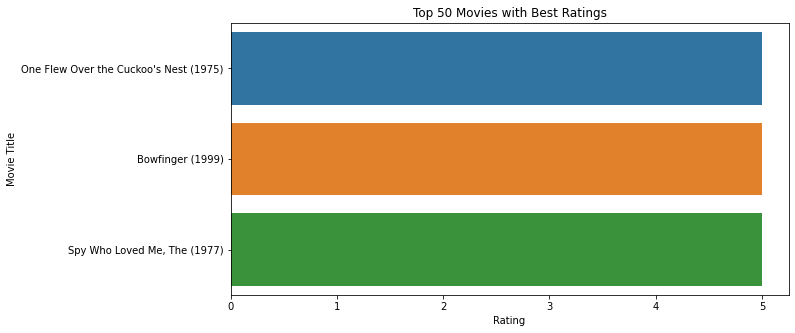

In [21]:
# Pega aquí la función de verificación
def plotting_best_50(las_mejores_50):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title('Top 50 Movies with Best Ratings')
    splot = sns.barplot(las_mejores_50['rating'], las_mejores_50['title'], ax=ax)
    ax.set(xlabel='Rating', ylabel='Movie Title')

plotting_best_50(las_mejores_50)

**Reto 5**
a) Creando un box plot de distribución de ratings

Vamos a ver cómo están distribuidos los ratings de las películas más valoradas de nuestro dataset. La siguiente es una lista de las películas que tienen más de 2500 valoraciones en nuestro dataset:

[2858, 260, 1196, 1210, 480, 2028, 589, 2571, 1270, 593, 1580, 1198, 608]

Realiza los siguientes pasos:
1. Lee tus archivos ratings y movies.
2. Obtén una lista con los ids de las películas con más de 2500 valoraciones.2. 3. Debe ser igual a la lista de arriba.
4. Crea una función que tome una lista de ids y un id y regrese True si el id se encuentra en la lista (puedes usar el operador in de Python).
5. Usa apply para aplicar esa función a la columna ratings['movie_id'] y obtener un filtro.
6. Usa tu filtro para filtrar el DataFrame ratings y quedarte solamente con las entradas de las películas que fueron valoradas más de 2500 veces.
7. Usando merge agrega los nombres de las películas a tu DataFrame ratings. 
8. Asigna el resultado a la variable ratings_filtrados_con_nombre.

In [27]:
conteo_ratings = rating_movie['movie_id'].value_counts()
filtro_mayor_2500_veces = conteo_ratings > 2500
conteo_mayor_2500_veces = conteo_ratings[filtro_mayor_2500_veces]
ids_mayor_2500_veces = conteo_mayor_2500_veces.index

In [49]:
#Función
def id_en_lista_ids_mayor_2500_veces(lista_ids, id_):
    return id_ in lista_ids

filtro_ratings = rating['movie_id'].apply(lambda x: id_en_lista_ids_mayor_2500_veces(ids_mayor_2500_veces, x))
ratings_filtrados = rating[filtro_ratings]
ratings_filtrados_con_nombre = pd.merge(ratings_filtrados, movie['title'], left_on='movie_id', right_index=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


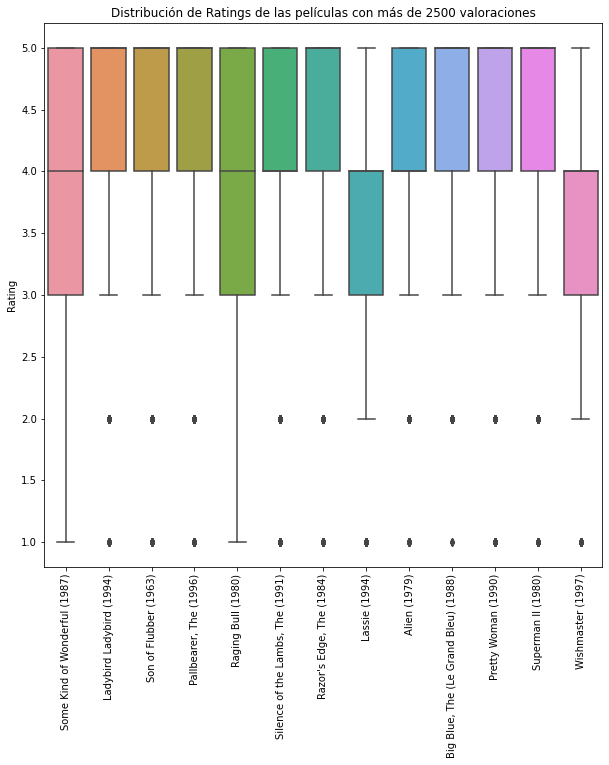

In [50]:
# Pega aquí la función de verificación
def visualizar_boxplots(ratings_filtrados_con_nombre):
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Distribución de Ratings de las películas con más de 2500 valoraciones')
    plot = sns.boxplot(ratings_filtrados_con_nombre['title'], ratings_filtrados_con_nombre['rating'], ax=ax)
    ax.set(xlabel=None, ylabel='Rating')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

visualizar_boxplots(ratings_filtrados_con_nombre)

**Reto 6**
Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para movies, ratings y users.
1. Agrega solamente la columna occupation al DataFrame ratings, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
1. Filtra tu tabla ratings para quedarte solamente con los ratings hechos por científicos.
1. Agrega solamente la columna title de la tabla movies a la tabla ratings para tener la información de los nombres de las películas que fueron evaluadas por científicos.
1. Filtra tu DataFrame para quedarte solamente con las películas que fueron evaluadas más de 50 veces.
1. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
1. Ordena la Serie resultante descendentemente y asígnala a la variable mean_of_scientists_ratings_sorted.

In [52]:
# DataFrames "movie" y "rating" ya están cargados, cargar sólo "user"
users = pd.read_csv("https://raw.githubusercontent.com/beduExpert/Procesamiento-de-Datos-con-Python-Santander/master/Datasets/MovieLens/users-full.csv")

In [53]:
#Merge
ratings_occupation = pd.merge(rating, users['occupation'], left_on='user_id', right_index=True)
only_scientist = ratings_occupation[ratings_occupation['occupation'] == 'scientist']
only_scientist_movie_title = pd.merge(only_scientist, movie['title'], left_on='movie_id', right_index=True)
only_scientist_movie_title.head()

,user_id,movie_id,rating,timestamp,occupation,title
53,2,1357,5,978298709,scientist,Young Guns (1988)
26976,192,1357,5,977028571,scientist,Young Guns (1988)
143888,928,1357,5,975194960,scientist,Young Guns (1988)
185332,1150,1357,3,974874113,scientist,Young Guns (1988)
201577,1242,1357,4,974908339,scientist,Young Guns (1988)


In [55]:
#Filtro
filtro_mayor_50_veces = only_scientist_movie_title['title'].value_counts() > 50
titulos_mayor_50_veces = only_scientist_movie_title['title'].value_counts()[filtro_mayor_50_veces].index

In [56]:
#Función
def titulo_en_lista(lista_titulos, title):
    return title in lista_titulos

In [59]:
mas_rankeadas = only_scientist_movie_title[only_scientist_movie_title['title'].apply(lambda x: titulo_en_lista(titulos_mayor_50_veces, x))]
promedio_scientist_ratings = mas_rankeadas.groupby('title')['rating'].mean()
mean_of_scientists_ratings_sorted = promedio_scientist_ratings.sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


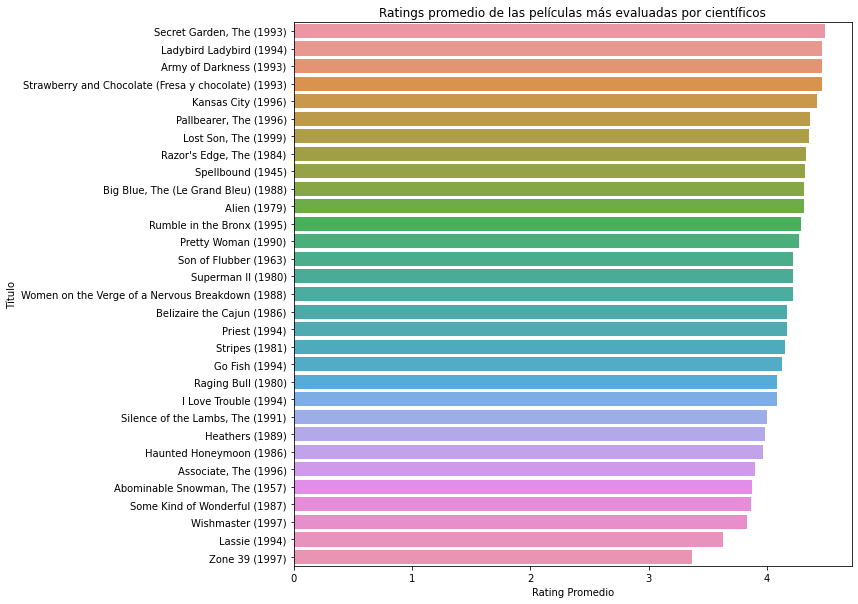

In [60]:
# Pega aquí la función de verificación 
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(mean_of_scientists_ratings_sorted, mean_of_scientists_ratings_sorted.index, ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')

visualizar_lista(mean_of_scientists_ratings_sorted)